# Data Project - Stock Market Analysis

Used data from the stock market, particularly some technology stocks.

1) Used pandas to get stock information, visualize different aspects of it

2) Analyzing the risk of a stock, based on its previous performance history.

3) Also predicting future stock prices through a Monte Carlo method.

Answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

## Part1: Basic Analysis of Stock information

In [1]:
#Basic Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [2]:
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #nice whitegrid background
%matplotlib inline

In [8]:
#Reading information from finance websites
from pandas.io.data import DataReader
#importing Date and time
from datetime import datetime
#taking care of floating numbers
from __future__ import division

In [10]:
#stock info of Apple, Google, Microsoft and Amazon
tech_list =['AAPL','GOOG','MSFT','AMZN']
end = datetime.now() #today
start = datetime(end.year-1,end.month,end.day) # a year ago

In [19]:
#grabbing the data
for stock in tech_list:
    #string name as a dataframe variable using globals
    globals()[stock] = DataReader(stock,'yahoo',start,end) 

In [20]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,120.076151,121.200238,118.788135,119.992222,5.283231e+07,118.742479
std,7.697058,7.396479,7.882265,7.619071,2.083597e+07,7.547982
min,94.870003,107.430000,92.000000,103.120003,1.447960e+07,102.680478
25%,112.827501,114.205000,111.652502,112.970003,3.861532e+07,112.080335
50%,120.795002,121.584999,119.349998,120.299999,4.844925e+07,119.612995
75%,127.142502,127.907497,125.982502,126.912502,6.093165e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-11-10 to 2015-11-09
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


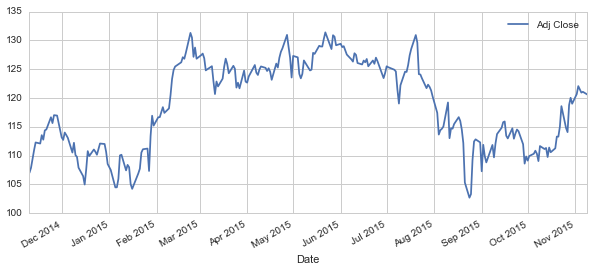

In [23]:
#checking the trend in adjusted closing price each day
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

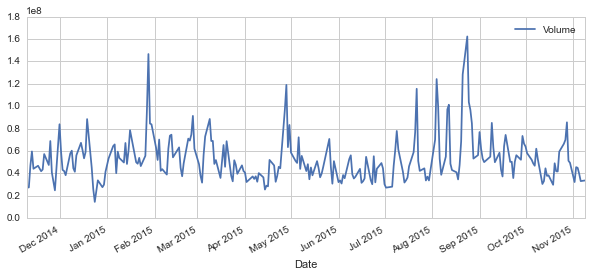

In [26]:
#checking the volume traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Calculating Moving Average

Refresher:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp



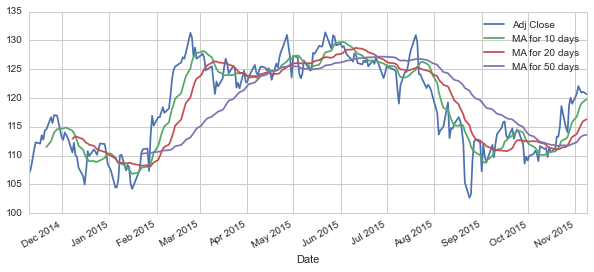

In [27]:
#moving average over different number of days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

#plotting all moving average data in one plot
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

## Part2: Daily Return Analysis

Analyzing the risk of the stock, by taking a closer look at the daily changes of the stock, not just absolute value. 

Retrieving the daily returns for the Apple stock.

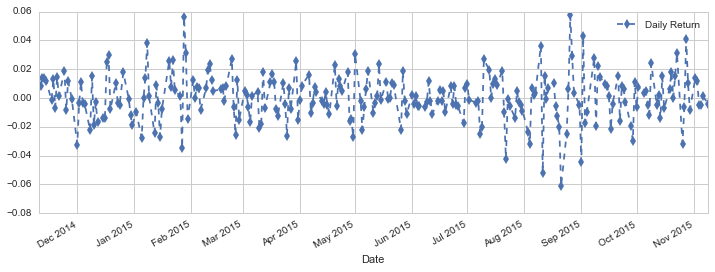

In [34]:
#added a new column called "daily return" = percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
#Plotting the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend = True, linestyle='--', marker='d')

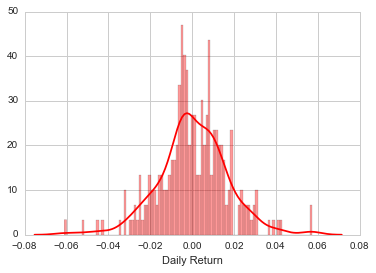

In [35]:
#average percentage return , using seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

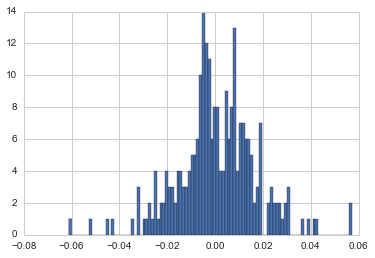

In [36]:
#average percentage return using pandas
AAPL['Daily Return'].hist(bins=100)

In [40]:
# collect all adjusted closeing prices for tech stock list into one dataframe
#using data reader
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-11-10,107.006784,305.109985,547.492463,47.614790
2014-11-11,107.862204,312.010010,550.292440,47.595311
2014-11-12,109.386240,311.510010,547.312465,47.507659
2014-11-13,110.929938,316.480011,545.382490,48.316012
2014-11-14,112.267154,327.820007,544.402507,48.286795


In [41]:
#creating new dataframe for percentage change/returns on all four tech stocks
tech_rets=closing_df.pct_change()

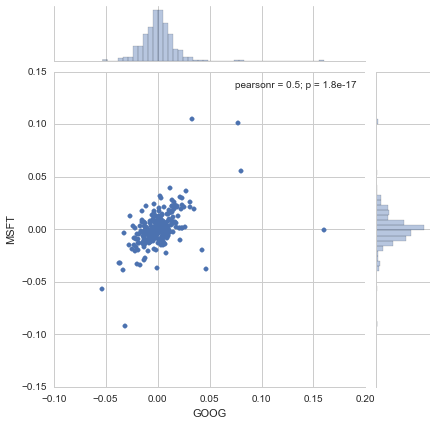

In [45]:
#using seaborn joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',data=tech_rets,kind='scatter')

Refresher:
Correlation examples

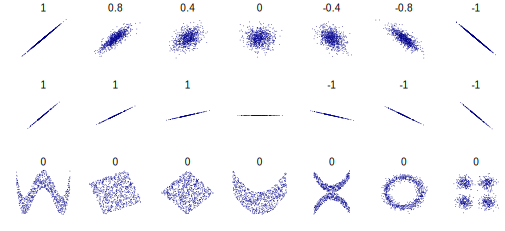

In [46]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

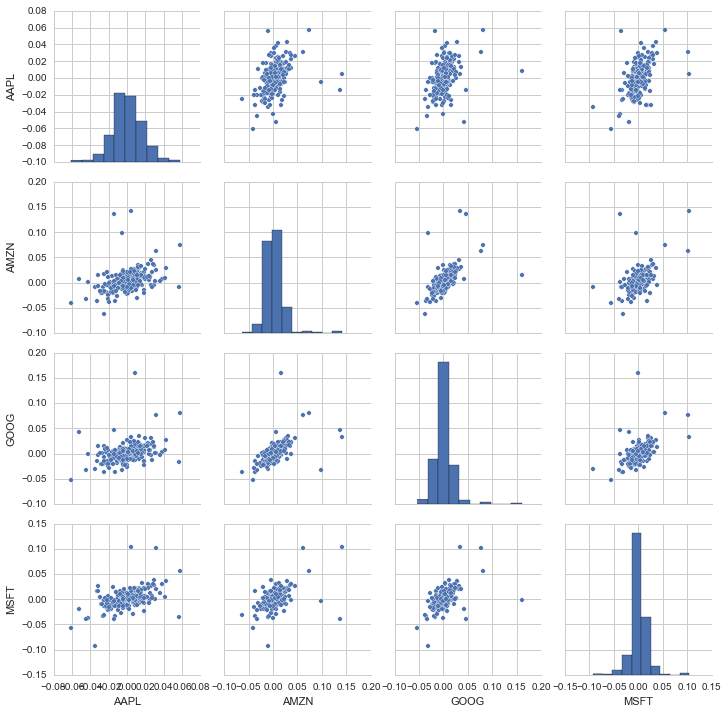

In [47]:
#pairplot from seaborn can be used to see all combinations of 
#correlation plots for all stocks
sns.pairplot(tech_rets.dropna())

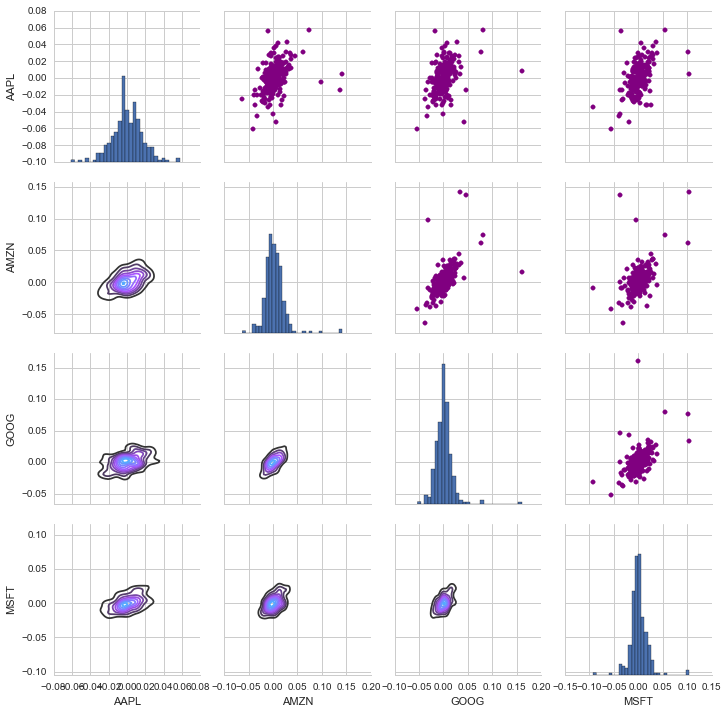

In [49]:
#utilizing pairgrid for a much better comparison between all stocks returns
#defining a figure that will hold all the comparison plots
returns_fig = sns.PairGrid(tech_rets.dropna())
#map upper is changed to be scatter plot
returns_fig.map_upper(plt.scatter,color='purple')
#map lower with KDE plots
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
#diagonal is histogram
returns_fig.map_diag(plt.hist,bins=30)

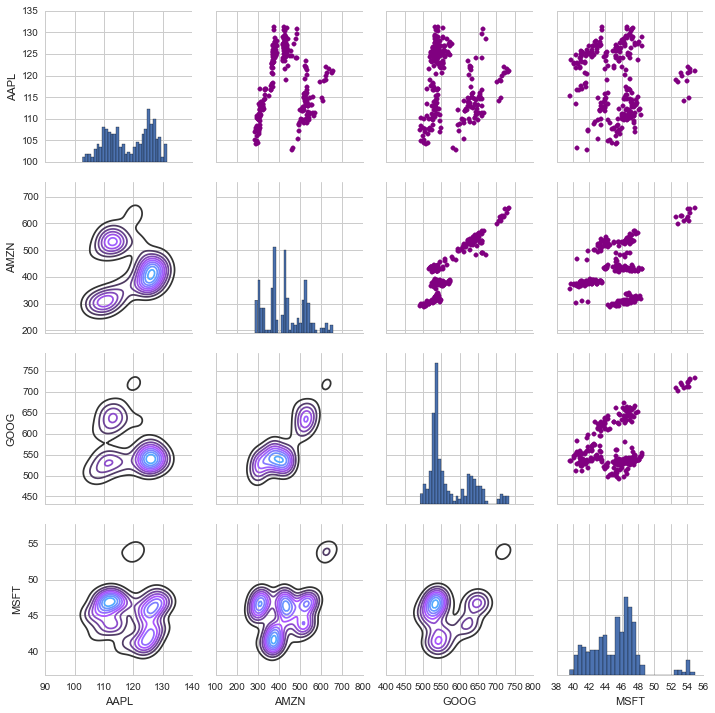

In [50]:
#utilizing pairgrid for a much better comparison between all stocks
#Adj closing price
#defining a figure that will hold all the comparison plots
returns_fig = sns.PairGrid(closing_df)
#map upper is changed to be scatter plot
returns_fig.map_upper(plt.scatter,color='purple')
#map lower with KDE plots
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
#diagonal is histogram
returns_fig.map_diag(plt.hist,bins=30)

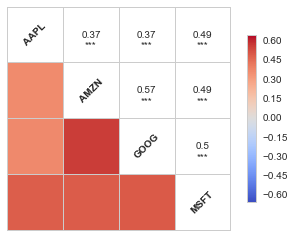

In [54]:
#getting absolute correlation values between return values of all stocks
sns.corrplot(tech_rets.dropna(),annot=True)

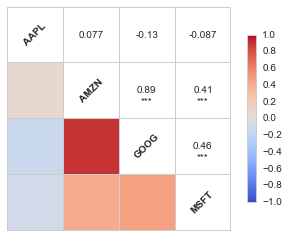

In [55]:
#getting absolute correlation values between Adj closing values of all stocks
sns.corrplot(closing_df,annot=True)

In [56]:
#CONCLUSION: NUMERICALLY AND VISUALLY AMAZON AND GOOGLE have strongest correlation
#with return values and adj closing price values.
#also interesting that positive correlation in returns for all tech companies

# PART 3: RISK ANALYSIS

Quantifying risk by comparing expected daily percentage returns and standard deviation of daily returns

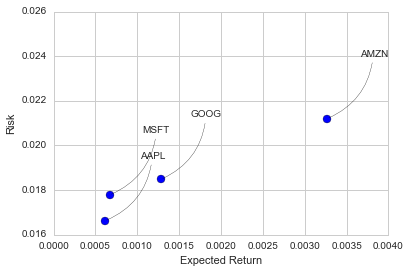

In [97]:
#clean copy of tech_rets dataframe
rets = tech_rets.dropna()
#making the plot points bigger by defining area of a circular point
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.xlim([0.000,0.004])
plt.ylim([0.016,0.026])
# Refresher 
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 60),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

    #Conclusion, expected return for amazon is higher, but risk is also higher
    #google expected return is higher, but risk is nominal

# Part 3: Value at Risk

value at risk defined here as the amount of money we could stand to lose(putting at risk) for a given confidence interval.

VaR using "Bootstrap Method"

Refresher: https://en.wikipedia.org/wiki/Quantile


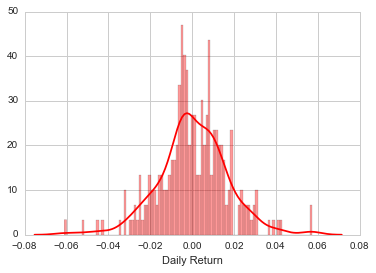

In [98]:
# Looking at apple stock using histogram in seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

In [101]:
AAPL['Daily Return'].quantile(0.05)

-0.025849984066616982

The 0.05 empirical quantile of daily returns is at -0.026. 
With 95% confidence, the worst daily loss will not exceed 2.6%. 
For a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.

-0.02174047028866688

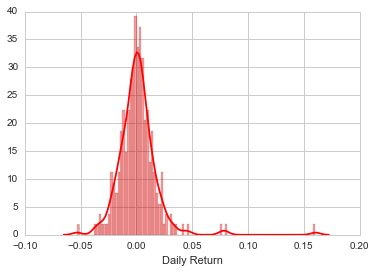

In [107]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='red')
GOOG['Daily Return'].quantile(0.05)

-0.020420830220782116

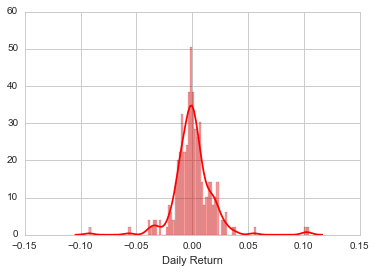

In [108]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='red')
MSFT['Daily Return'].quantile(0.05)

-0.021360026714234592

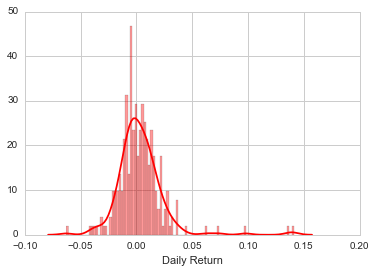

In [109]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='red')
AMZN['Daily Return'].quantile(0.05)

Refresher: http://www.investopedia.com/articles/07/montecarlo.asp

Using Montecarlo Method with (Geometric Brownian Motion) GBM for VaR assessment

In [111]:
from IPython.display import Image
Image(url='http://i.investopedia.com/inv/articles/site/CT-MonteCarlo3ra.gif')


In [112]:
#Setting up the timeline
days=365;
#delta from formula
dt=1/days;
#mu(drift) from the expected return data for AAPL
mu = rets.mean()['AAPL']
#sigma is the SD of the  return data for AAPL
sigma = rets.std()['AAPL']


In [130]:

# Creating a function that takes starting price on day 1 and number of days, 
#uses sigma and mu, a RNG for epsilon
# gives the random walk price for all the 365 days
def stock_monte_carlo(start_price,days,mu,sigma):
    
#price array
    price = np.zeros(days)
    price[0] = start_price
#Calculating Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    #Calculate price array for number of days
    for x in xrange(1,days):
        #drift
        drift[x] = mu * dt
        #shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        price[x] = price[x-1]*(1+(drift[x]+shock[x]))
    return price

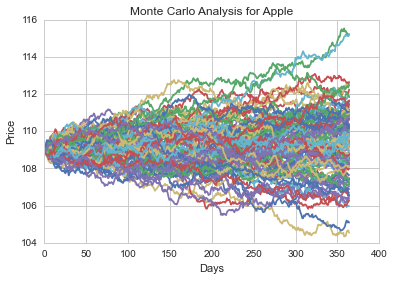

In [134]:
#start price is first value of AAPL column
start_price = AAPL['Open'][0]

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [135]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    #value at the end of 365 days
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

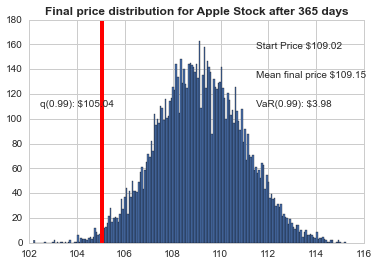

In [146]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)

# figure texts
#Start price
plt.figtext(0.65,0.8,s="Start Price $%.2f" %start_price)
#Mean ending price, mean of the final values on day 365
plt.figtext(0.65,0.7,"Mean final price $%.2f" %simulations.mean())
#Variance of the price(within 99% confidence interval)
plt.figtext(0.65,0.6,"VaR(0.99): $%.2f" %(start_price-q))
#1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)
#Plotting a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')
#fig title
plt.title("Final price distribution for Apple Stock after %s days" 
          %days,weight="bold")
